In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
           'acceleration', 'model_year', 'origin', 'car_name']
df = pd.read_csv(url, names=columns, delim_whitespace=True)


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [4]:
# Explore the first few rows of the dataset
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


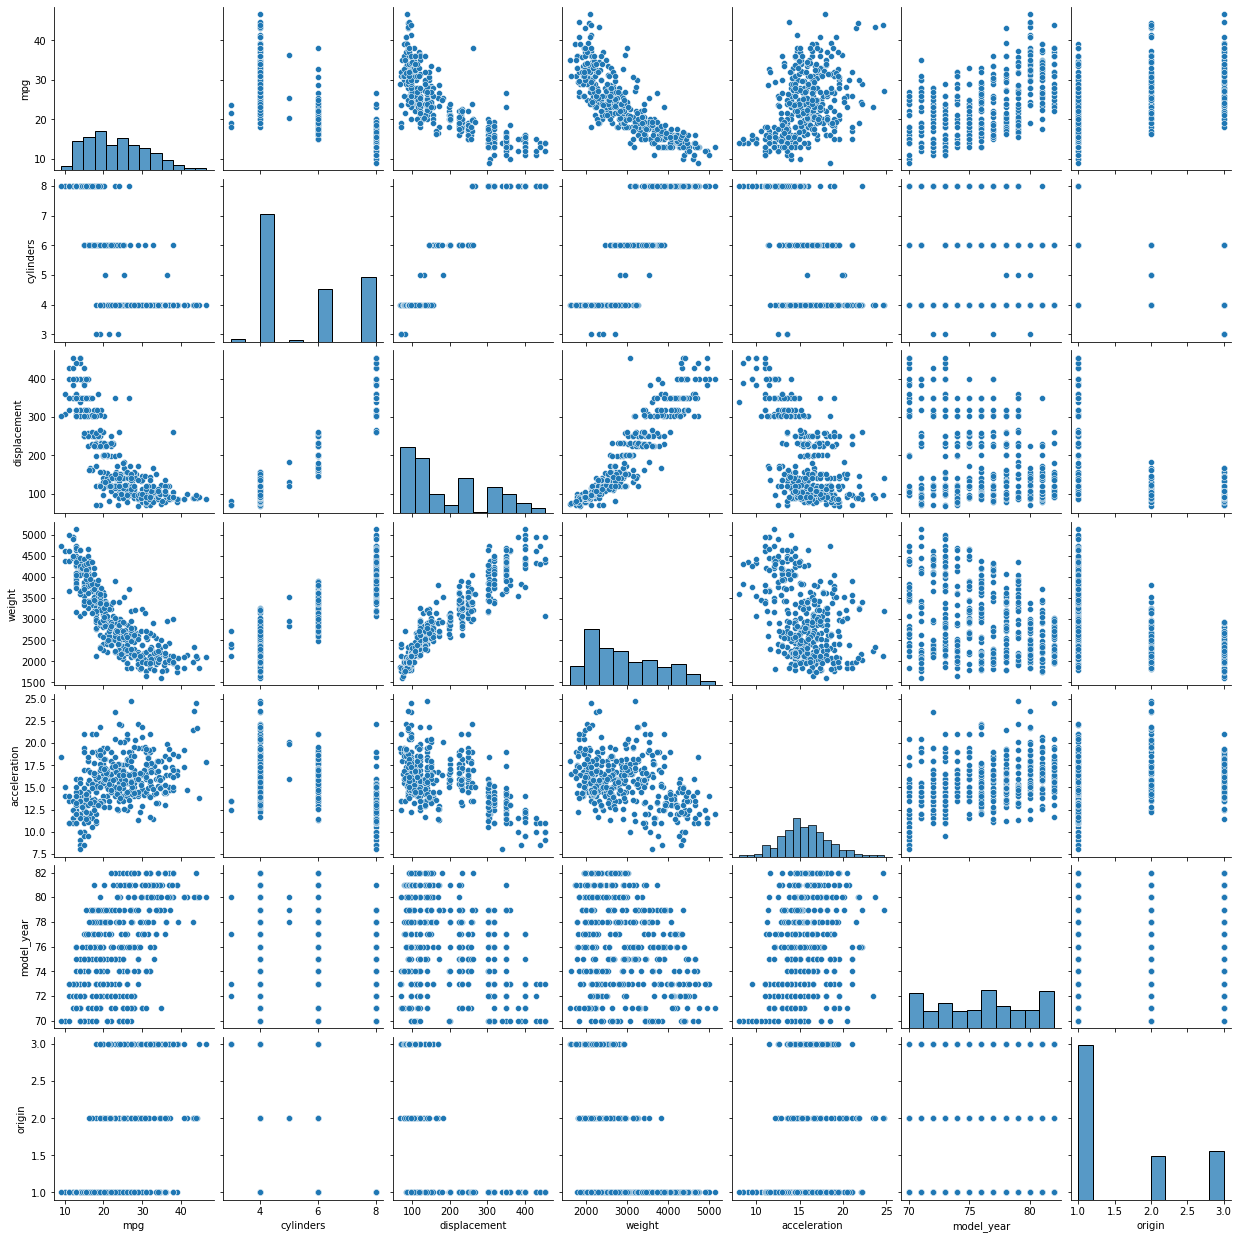

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for data visualization
sns.pairplot(df)
plt.show()

In [5]:
# Check for missing values
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


In [6]:
# Data summary
print(df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model_year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [7]:
# Get the meta data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


### Data Preprocessing

In [8]:
# Handling missing values
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = df['horsepower'].astype(float)
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [9]:
# Convert categorical 'origin' to one-hot encoding
df = pd.get_dummies(df, columns=['origin'])

# Drop irrelevant columns like 'car_name'
df.drop(['car_name'], axis=1, inplace=True)

In [10]:
# Split data into features (X) and target (y)
X = df.drop('mpg', axis=1)  # Independant Variable
y = df['mpg']  

In [12]:
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Training and Evaluation

In [13]:
# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
dt_model = DecisionTreeRegressor()

In [16]:
# Train models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)


DecisionTreeRegressor()

In [17]:
# Predictions
lr_pred = lr_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
dt_pred = dt_model.predict(X_test_scaled)



In [19]:
# Evaluation metrics
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

# mse - Mean Squared Error
# mae - Mean Absolute Error
# r^2 error

In [21]:
lr_mse, lr_mae, lr_r2 = evaluate_model(y_test, lr_pred)
rf_mse, rf_mae, rf_r2 = evaluate_model(y_test, rf_pred)
dt_mse, dt_mae, dt_r2 = evaluate_model(y_test, rf_pred)


In [23]:
print("Linear Regression Metrics:")
print(f"MSE: {lr_mse:.2f}, MAE: {lr_mae:.2f}, R-squared: {lr_r2:.2f}")

Linear Regression Metrics:
MSE: 8.34, MAE: 2.29, R-squared: 0.84


In [24]:
print("\nRandom Forest Regression Metrics:")
print(f"MSE: {rf_mse:.2f}, MAE: {rf_mae:.2f}, R-squared: {rf_r2:.2f}")


Random Forest Regression Metrics:
MSE: 4.51, MAE: 1.57, R-squared: 0.92


In [25]:
print("Decision Tree Regression Metrics:")
print(f"MSE: {dt_mse:.2f}, MAE: {dt_mae:.2f}, R-squared: {dt_r2:.2f}")

Decision Tree Regression Metrics:
MSE: 4.51, MAE: 1.57, R-squared: 0.92


In [26]:
# Feature Importance (Random Forest)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False, inplace=True)

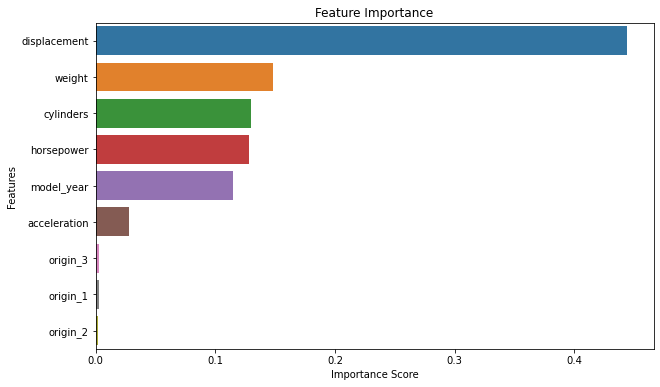

In [31]:
# Visualize Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [2]:
# Sample user input (replace with actual user input)
user_input = {
    'cylinders' : 2,
    'displacement': 202.2,
    'horsepower': 170,
    'weight': 2500,
    'acceleration': 14.5,
    'model_year' : 2023,
    'origin_1' : 1,
    'origin_2' : 0,
    'origin_3' : 0
}

In [9]:
import seaborn as sns

In [10]:
# Convert user input to DataFrame
user_data = pd.DataFrame([user_input])

# Standardize user input using the same scaler used for training
scaler = StandardScaler()

NameError: name 'pd' is not defined

In [4]:
# Standardize user input using the scaler fitted on training data
X_user_scaled = scaler.fit_transform(user_data)

# Predict MPG using the trained Linear Regression model
predicted_mpg = lr_model.predict(X_user_scaled)

print(f"Predicted MPG: {predicted_mpg[0]:.2f} MPG")

NameError: name 'scaler' is not defined

In [5]:
# Predict MPG using the trained Random Forest Regression model
predicted_mpg = rf_model.predict(X_user_scaled)

print(f"Predicted MPG: {predicted_mpg[0]:.2f} MPG")

NameError: name 'rf_model' is not defined

In [6]:
# Predict MPG using the trained Decision Tree Regression model
predicted_mpg = dt_model.predict(X_user_scaled)

print(f"Predicted MPG: {predicted_mpg[0]:.2f} MPG")

NameError: name 'dt_model' is not defined